## License Information
---

This file is distributed as part of `swprocess`, a Python package for surface wave processing.

    Copyright (C) 2020 Joseph P. Vantassel (jvantassel@utexas.edu)

    This program is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program.  If not, see <https: //www.gnu.org/licenses/>.
    
## About _swprocess_ and this notebook
---

`swprocess` is a Python package for surface wave processing. `swprocess` was developed by
Joseph P. Vantassel under the supervision of Professor Brady R. Cox at The University of
Texas at Austin.

If you use _swprocess_ in your research or consulting, we ask you please cite the following:

__TBD__

<!-- >Joseph Vantassel. (2020). jpvantassel/hvsrpy: latest (Concept). Zenodo.
[http://doi.org/10.5281/zenodo.3666956](http://doi.org/10.5281/zenodo.3666956)
 _Note: For software, version specific citations should be preferred to
general concept citations, such as that listed above. To generate a version
specific citation for `hvsrpy`, please use the citation tool on the `hvsrpy`
[archive](http://doi.org/10.5281/zenodo.3666956)._
 -->

<!-- The automated frequency-domain window-rejection algorithm and log-normal statistics
implemented in `hvsrpy` were developed by Tianjian Cheng under the supervision of
Professor Brady R. Cox at The University of Texas at Austin. To
recognize their original work please cite the follwing:

> Cox, B. R., Cheng, T., Vantassel, J. P., and Manuel, L. (2020). “A statistical
> representation and frequency-domain window-rejection algorithm for single-station
> HVSR measurements.” Geophysical Journal International, 221(3), 2170-2183.

This notebook also provides automatic checking of the SESAME (2004) reliability
and clarity critera. To recognize their original work please also cite the following:

> SESAME. (2004). Guidelines for the Implementation of the H/V Spectral Ratio Technique on Ambient Vibrations
> Measurements, Processing, and Interpretation. European Commission - Research General Directorate, 62,
> European Commission - Research General Directorate.
 -->
 
## Getting Started
---
1. Install _swprocess_ and its dependencies, with `pip install swprocess`. If you are not familiar with `pip`, a useful tutorial can be found [here](https://jpvantassel.github.io/python3-course/#/intro/pip). __(~3 minutes)__ 

__TBD__

Happy Processing!

In [1]:
import os
import json
import time

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np

import swprocess

## Input
---

### Files

In [2]:
# Files
# fnames = [f"sample_data/wghs/{x}.dat" for x in range(6, 10)]

set0 = [f"../../inl/atr/raw_data/active/{x}.dat" for x in range(11, 15)]
set1 = [f"../../inl/atr/raw_data/active/{x}.dat" for x in range(16, 20)]
set2 = [f"../../inl/atr/raw_data/active/{x}.dat" for x in range(21, 25)]
set3 = [f"../../inl/atr/raw_data/active/{x}.dat" for x in range(26, 30)]
set4 = [f"../../inl/atr/raw_data/active/{x}.dat" for x in range(31, 35)]
set5 = [f"../../inl/atr/raw_data/active/{x}.dat" for x in range(36, 40)]

fnames = [set0, set1, set2, set3, set4, set5]

# Workflow {"time-domain", "frequency-domain", "single"}, time-domain is recommended
workflow = "time-domain"

### Pre-processing

In [3]:
# Trimming
trim = True
start_time, end_time = 0, 0.6

# Mute
mute = False
method = "interactive"
window_kwargs = {}

# Zero-padding
pad = True
df = 0.2

### Processing

In [4]:
transform = "slantstack"
fmin, fmax = 5, 100
vmin, vmax, nvel, vspace = 200, 1500, 300, "linear"
fdbf_weighting = "sqrt"
fdbf_steering = "cylindrical"

### Signal-to-Noise

In [5]:
snr = False
noise_begin, noise_end =  -0.5, 0.
signal_begin, signal_end = 0., 0.5
pad_snr, df_snr = False, 1

## Analysis
---

In [6]:
%matplotlib qt5
settings_fname = "masw_settings.json"
swprocess.Masw.create_settings_file(fname=settings_fname, workflow=workflow,
                                     trim=trim, start_time=start_time, end_time=end_time,
                                     mute=mute, method=method, window_kwargs=window_kwargs,
                                     transform=transform, fmin=fmin, fmax=fmax,
                                     vmin=vmin, vmax=vmax, nvel=nvel, vspace=vspace,
                                     weighting=fdbf_weighting, steering=fdbf_steering,
                                     snr=snr, noise_begin=noise_begin, noise_end=noise_end,
                                     signal_begin=signal_begin, signal_end=signal_end,
                                     pad_snr = pad_snr, df_snr=df_snr
                                    )

start = time.perf_counter()
wavefieldtransforms = []
for fname_set in fnames: 
    wavefieldtransforms.append(swprocess.Masw.run(fnames=fname_set, settings_fname=settings_fname))
end = time.perf_counter()
print(f"Elapsed Time (s): {round(end-start,2)}")

Elapsed Time (s): 1.2


## Post-Analysis Settings
---

### Dispersion Image

In [13]:
# Image normalization {"none", "absolute-maximum" "frequency-maximum"} -> "frequency-maximum" is recommended.
# wavefield_normalization = "absolute-maximum"
wavefield_normalization = "none"
# wavefield_normalization = "frequency-maximum"

## Plot Results
---

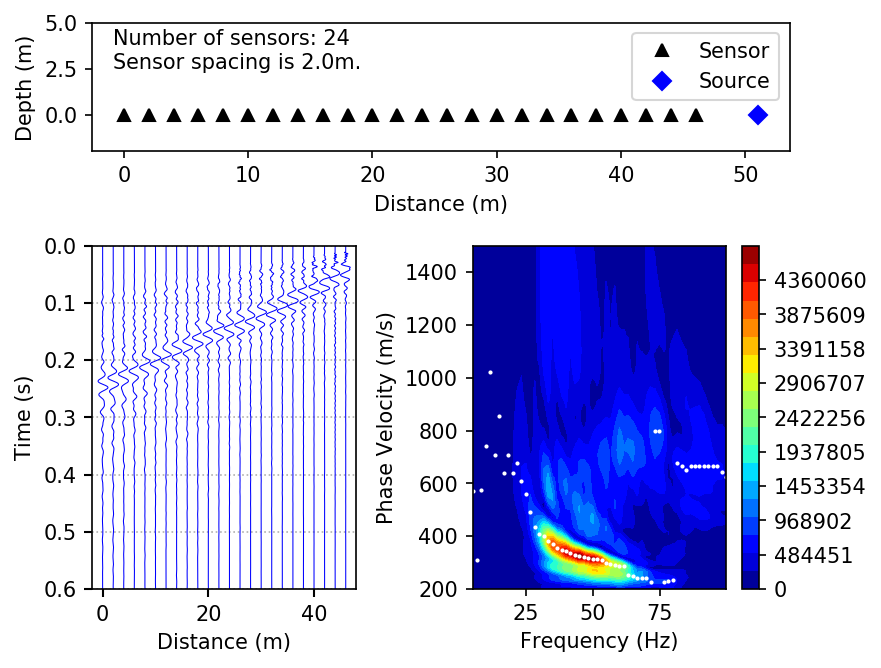

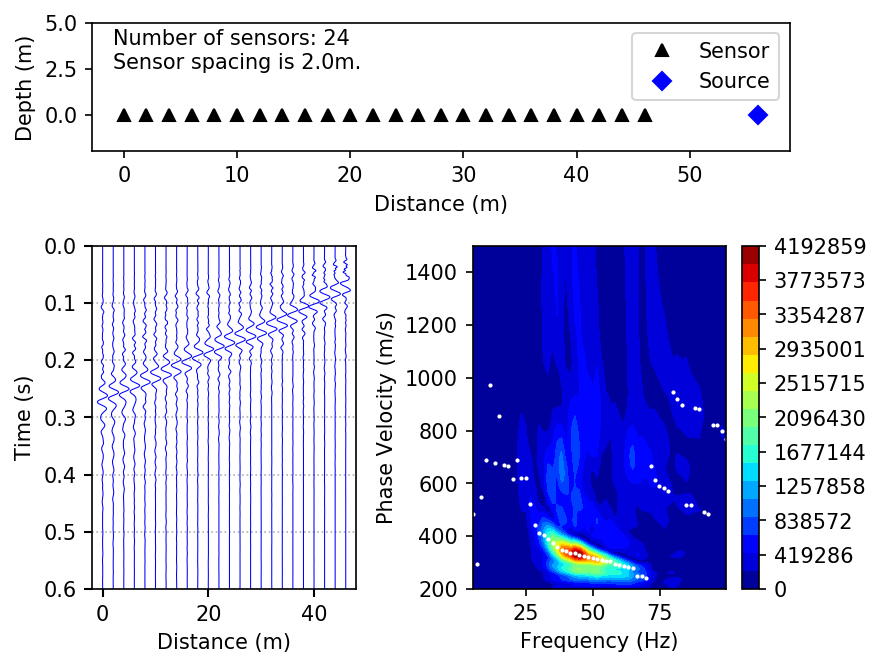

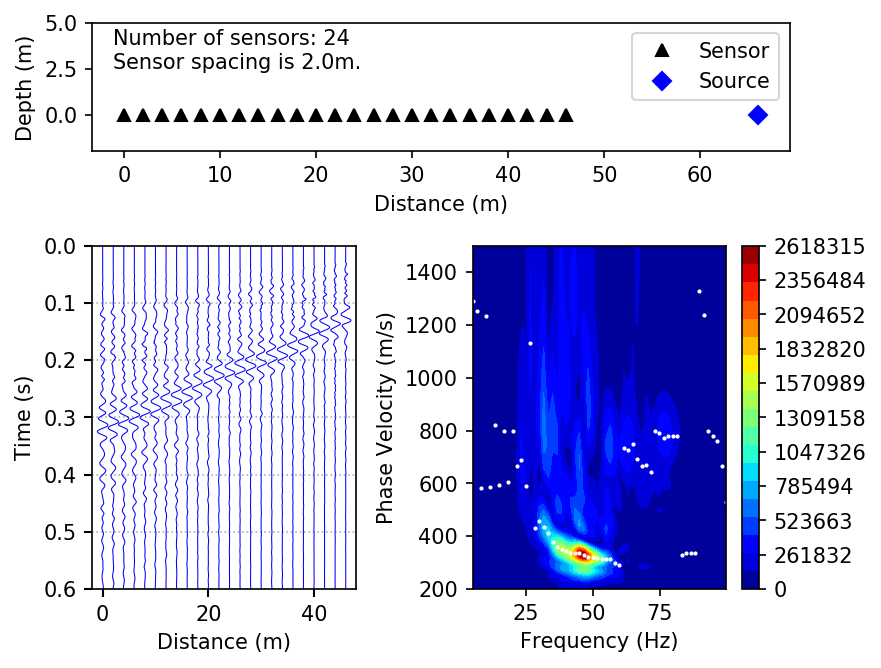

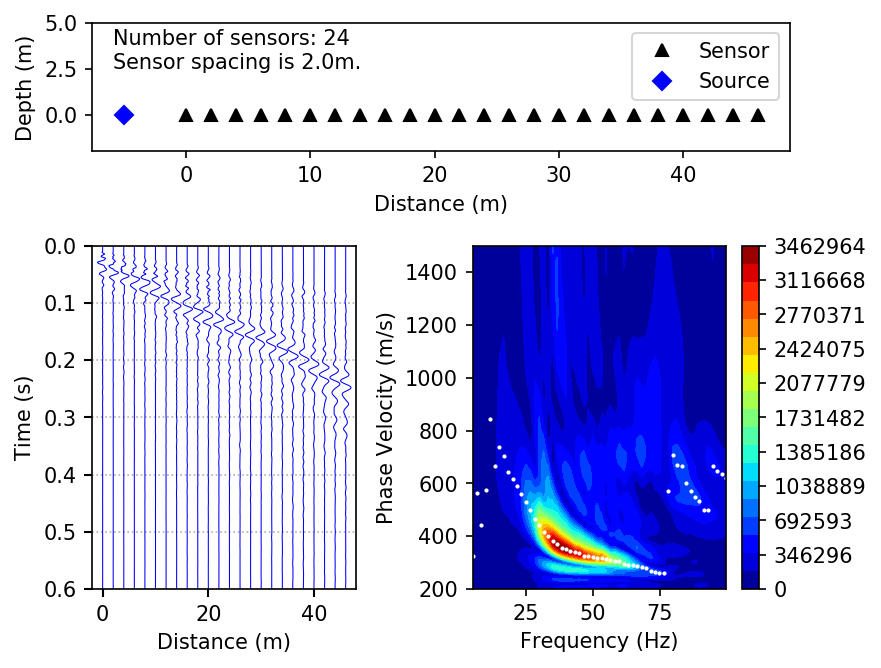

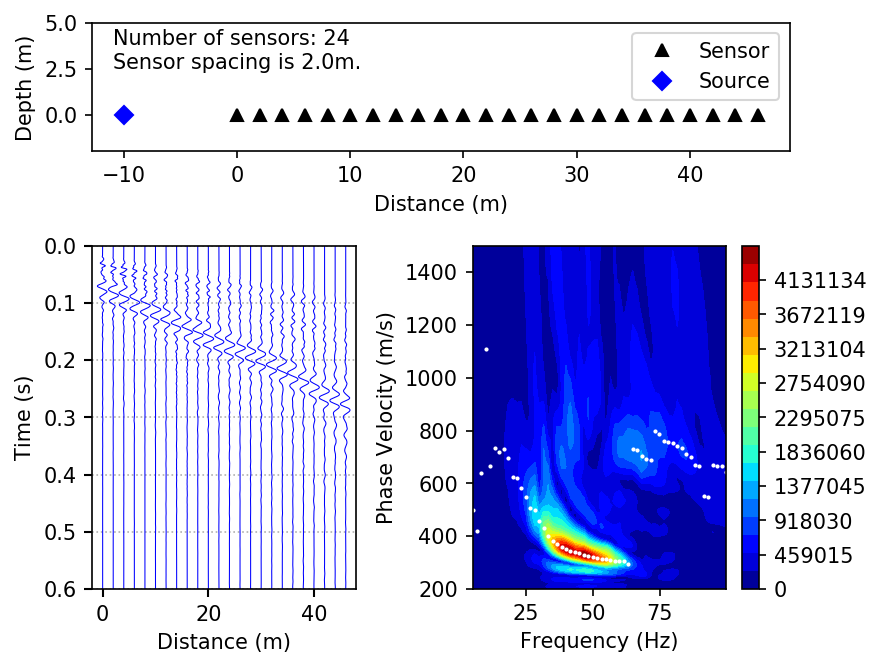

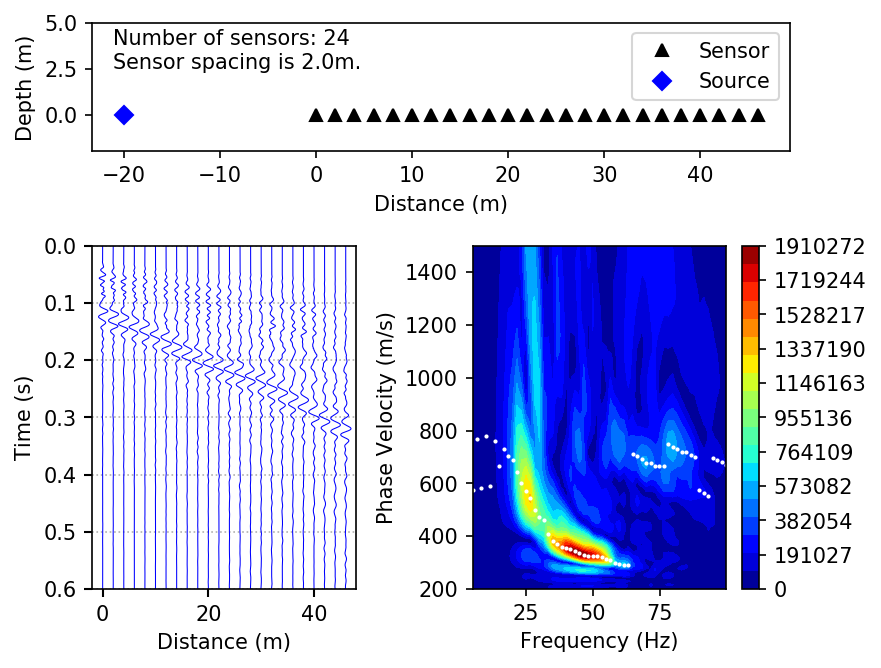

In [14]:
%matplotlib inline
for wavefieldtransform in wavefieldtransforms:
    fig = plt.figure(figsize=(6,5), dpi=150)

    gs = GridSpec(nrows=2, ncols=2, height_ratios=(1.5, 4), width_ratios=(1, 1.2), hspace=0.4, wspace=0.4)
    ax0 = fig.add_subplot(gs[0, :])
    ax1 = fig.add_subplot(gs[1, 0])
    ax2 = fig.add_subplot(gs[1, 1])

    # Array
    wavefieldtransform.array.plot(ax=ax0)
    ax0.set_ylabel("Depth (m)")

    # Timeseries
    wavefieldtransform.array.waterfall(ax=ax1, amplitude_detrend=False, amplitude_normalization="each")

    # Dispersion Image
    wavefieldtransform.plot(fig=fig, ax=ax2, normalization=wavefield_normalization)

plt.show()

## Save Peaks to File
---

In [ ]:
fname = "active.json"

try:
    os.remove(fname)
except FileNotFoundError:
    print(f"No existing file named {fname}.")

for wavefieldtransform in zip(wavefieldtransforms):
    wavefieldtransform.write_peaks_to_file(fname, append=True)

## Post-Process

In [ ]:
fname = "active.json"

peaksuite = swprocess.PeaksSuite.from_jsons(fname)

In [ ]:
peaksuite.blitz("velocity", (None, 600))
fig, ax = peaksuite.plot()
ax[0].legend(loc="center left", bbox_to_anchor=(1,0.5))
plt.show()

In [ ]:
%matplotlib qt
peaksuite.interactive_trimming("sample_settings/settings_post.json")

In [ ]:
%matplotlib inline
fig, ax = peaksuite.plot(xtype="wavelength")
ax[0].set_xlim(1, 100)

In [ ]:
stats = peaksuite.statistics(xx=np.geomspace(3, 30, 20), xtype="wavelength", ytype="velocity")

In [ ]:
xx, mean, stddev, corr = stats

In [ ]:
%matplotlib inline
fig, ax = peaksuite.plot(xtype="wavelength")
ax[0].errorbar(xx, mean, yerr=stddev, color="r", linestyle="", capsize=2, zorder=15)
ax[0].set_xlim(3, 30)
plt.show()

In [ ]:
fig, axs = randplot.plot_stats(*stats)

for ax in axs:
    randplot.fancy_log_ax(ax)
plt.show()